<a href="https://colab.research.google.com/github/pknemi/deeplearning_project/blob/main/Facial_Expression_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau



In [ ]:
!unzip -q "face_expression_recognition.zip" -d "unzipped_data"

## 1.Data Reading and Loading

In [ ]:
data_dir = "images/images"

train_dir = os.path.join(data_dir,"train")

validation_dir = os.path.join(data_dir,'validation')

In [ ]:
#image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen =  ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=64,
    class_mode="categorical",
    color_mode="grayscale",

)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48,48),
    batch_size=64,
    class_mode="categorical",
    color_mode="grayscale",

)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


### 2. EDA visualize some images

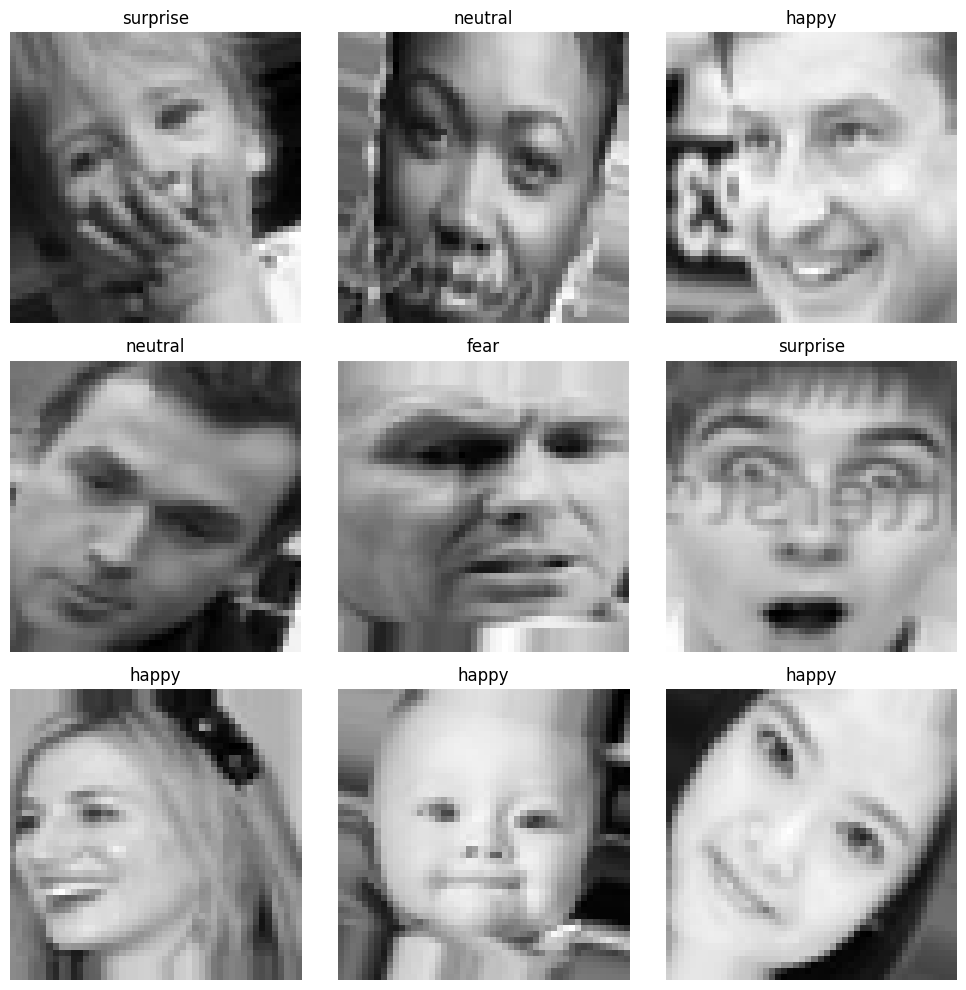

In [ ]:
class_names = list(train_generator.class_indices.keys())
images,labels = next(train_generator)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].reshape(48,48),cmap="gray")
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()

### 3.CNN Model Architechture

In [ ]:
model = Sequential([
    Conv2D(64,(3,3),activation="relu",input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),


    Conv2D(128,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(256,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(512,activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 128)      5

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

### 4. Model Training

In [ ]:
early_Stoping = EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss",factor=0.2,patience=3,min_lr=1e-6,verbose=1)

In [ ]:
#model training
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_Stoping,lr_scheduler]
)

Epoch 1/50
451/451 [==============================] - 343s 728ms/step - loss: 2.0867 - accuracy: 0.2822 - val_loss: 1.9697 - val_accuracy: 0.3183 - lr: 0.0010
Epoch 2/50
451/451 [==============================] - 27s 60ms/step - loss: 1.5947 - accuracy: 0.3975 - val_loss: 1.3902 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 3/50
451/451 [==============================] - 26s 58ms/step - loss: 1.4631 - accuracy: 0.4385 - val_loss: 1.3817 - val_accuracy: 0.4718 - lr: 0.0010
Epoch 4/50
451/451 [==============================] - 27s 60ms/step - loss: 1.3975 - accuracy: 0.4636 - val_loss: 1.3922 - val_accuracy: 0.4902 - lr: 0.0010
Epoch 5/50
451/451 [==============================] - 27s 60ms/step - loss: 1.3510 - accuracy: 0.4848 - val_loss: 1.3075 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 6/50
451/451 [==============================] - 27s 60ms/step - loss: 1.3259 - accuracy: 0.4963 - val_loss: 1.3858 - val_accuracy: 0.4829 - lr: 0.0010
Epoch 7/50
451/451 [==============================] - 27

### 5.Evaluation- Classification Report and COnfusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

2/2 [==============================] - 0s 49ms/step
              precision    recall  f1-score   support

       angry       0.56      0.62      0.59         8
     disgust       0.00      0.00      0.00         1
        fear       0.60      0.55      0.57        11
       happy       0.86      0.86      0.86        14
     neutral       0.71      0.77      0.74        13
         sad       0.64      0.58      0.61        12
    surprise       0.67      0.80      0.73         5

    accuracy                           0.69        64
   macro avg       0.58      0.60      0.58        64
weighted avg       0.68      0.69      0.68        64



C:\Users\nisam\anaconda3\envs\baseEnv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nisam\anaconda3\envs\baseEnv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nisam\anaconda3\envs\baseEnv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


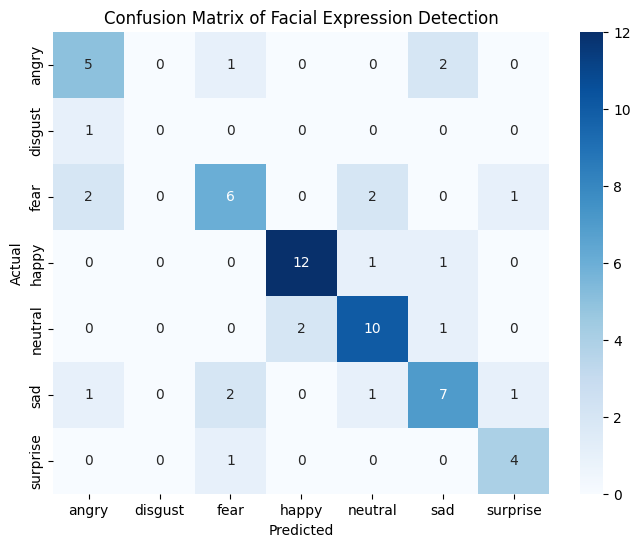

In [ ]:
val_images,val_labels = next(validation_generator)
predictions = model.predict(val_images)

y_true =np.argmax(val_labels,axis=1)
y_pred = np.argmax(predictions,axis=1)

print(classification_report(y_true,y_pred,target_names=class_names))
cm  =confusion_matrix(y_true,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Facial Expression Detection')
plt.show()

### 6-Detection System

1/1 [==============================] - 1s 687ms/step


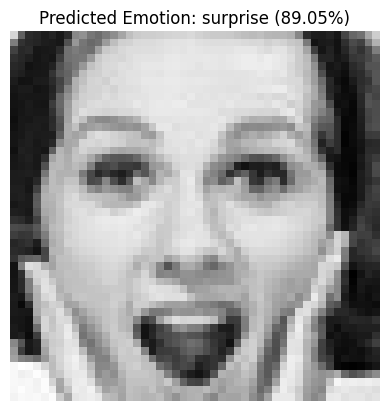

Emotion: surprise, Confidence: 89.05%


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def detect_emotion(image_path):
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = round(prediction[0][predicted_index] * 100, 2)  # Confidence in %

    # Display the image with the predicted label and confidence
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Emotion: {predicted_class} ({confidence}%)')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Example Detection
predicted_emotion, confidence = detect_emotion(r'D:\Codeme\Deep_Learning_Batches\december_2023\emotion_Detection_webapp\images\images\train\surprise\10011.jpg')
print(f"Emotion: {predicted_emotion}, Confidence: {confidence}%")


1/1 [==============================] - 0s 35ms/step


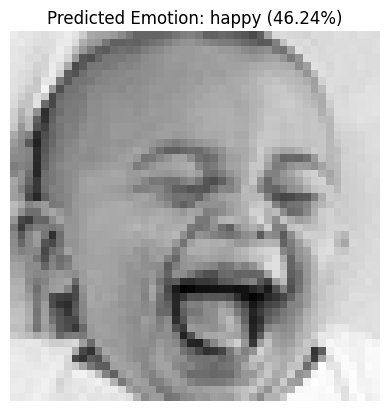

Emotion: happy, Confidence: 46.24%


In [ ]:
predicted_emotion, confidence = detect_emotion(r'D:\Codeme\Deep_Learning_Batches\december_2023\emotion_Detection_webapp\images\images\train\happy\57.jpg')
print(f"Emotion: {predicted_emotion}, Confidence: {confidence}%")


### 8.Save the model

In [ ]:
model.save("facial_expression_model.h5")

In [ ]:
model.save("facial_expression_model.tf")

INFO:tensorflow:Assets written to: facial_expression_model.tf\assets


INFO:tensorflow:Assets written to: facial_expression_model.tf\assets
